In [ ]:
pip install xgboost

In [ ]:
pip install shap

In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score

In [2]:
test_raw = pd.read_csv('test_set.csv')
train_raw = pd.read_csv('train_set.csv')
valid_raw = pd.read_csv('valid_set.csv')

In [3]:
from data_process import convert_to_categorical
test = convert_to_categorical(test_raw)
train = convert_to_categorical(train_raw)
valid = convert_to_categorical(valid_raw)

In [4]:
from data_process import split_and_drop
X_train, y_train = split_and_drop(train, version = 'default')
X_valid, y_valid = split_and_drop(valid, version = 'default')
X_test, y_test = split_and_drop(test, version = 'default')

In [5]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

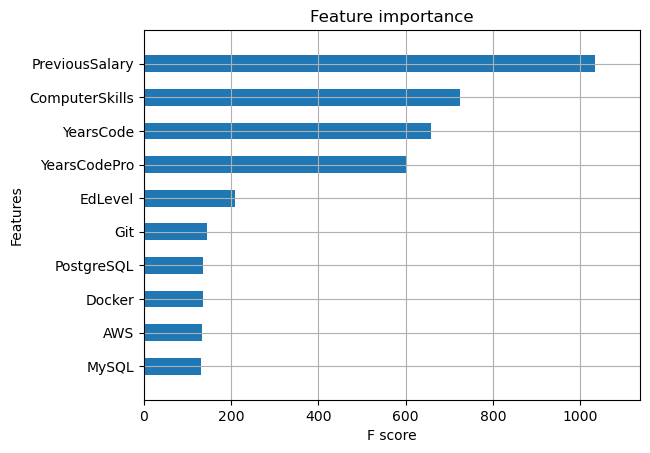

In [6]:
xgb.plot_importance(xgb_clf,height = .5, 
                        max_num_features=10,
                        show_values = False)

In [8]:
# Make predictions
y_pred = xgb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

Accuracy: 0.84
Recall: 0.86


[18:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


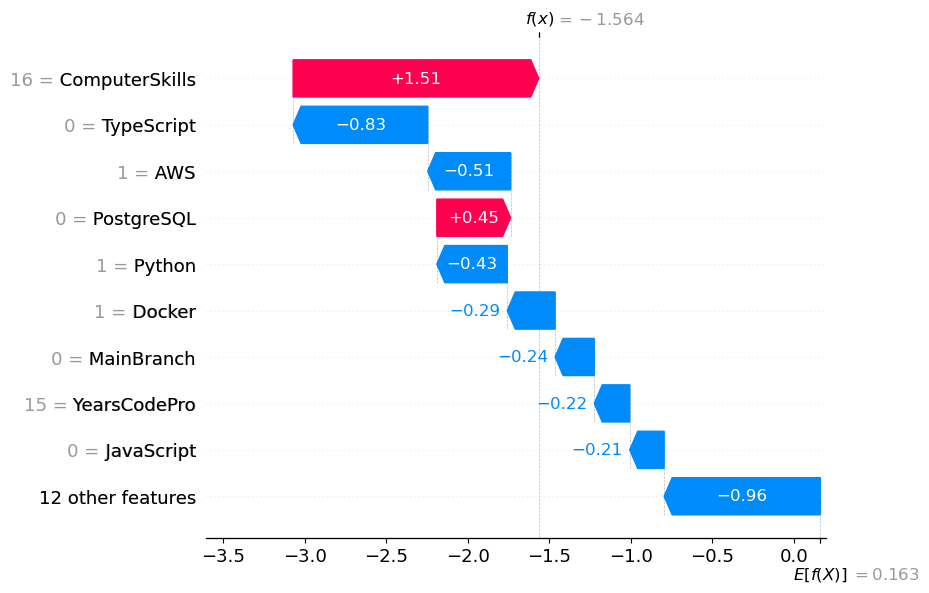

In [9]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_train)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

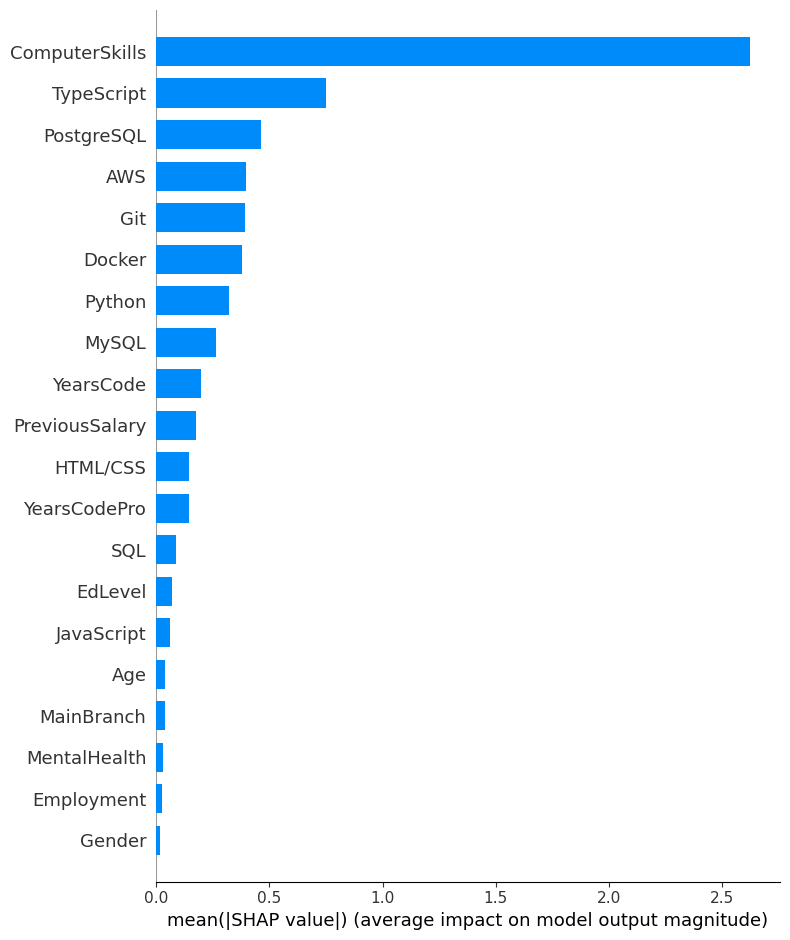

In [10]:
shap.summary_plot(shap_values, X_train, 
                  plot_type="bar")

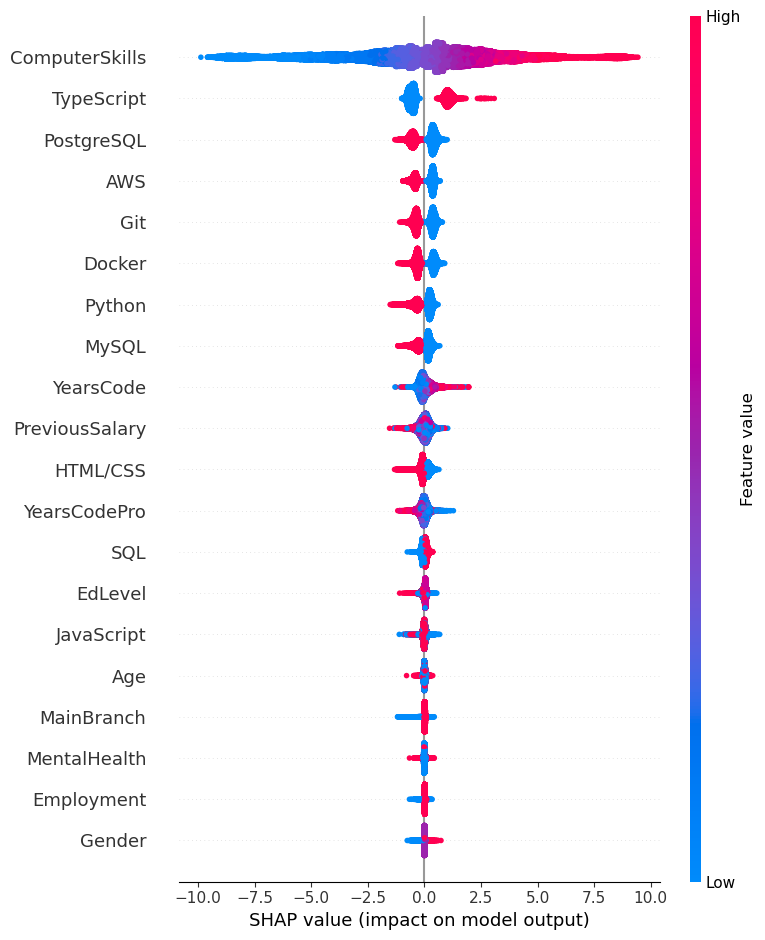

In [11]:
shap.summary_plot(shap_values, X_train, 
                  plot_type="dot")

y 轴上的位置由特征确定，x 轴上的位置由每 Shapley value 确定。颜色表示特征值（红色高，蓝色低），颜色使我们能够匹配特征值的变化如何影响风险的变化。重叠点在 y 轴方向抖动，因此我们可以了解每个特征的 Shapley value分布，并且这些特征是根据它们的重要性排序的。
![Alt text](image.png)

In [ ]:
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

In [ ]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
# 限制20个样本
features = X.iloc[range(20)]
# 展示第一条样本
shap_values = explainer.shap_values(features)[1]

shap.decision_plot(expected_value, shap_values, 
                   features_display)

[02:47:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


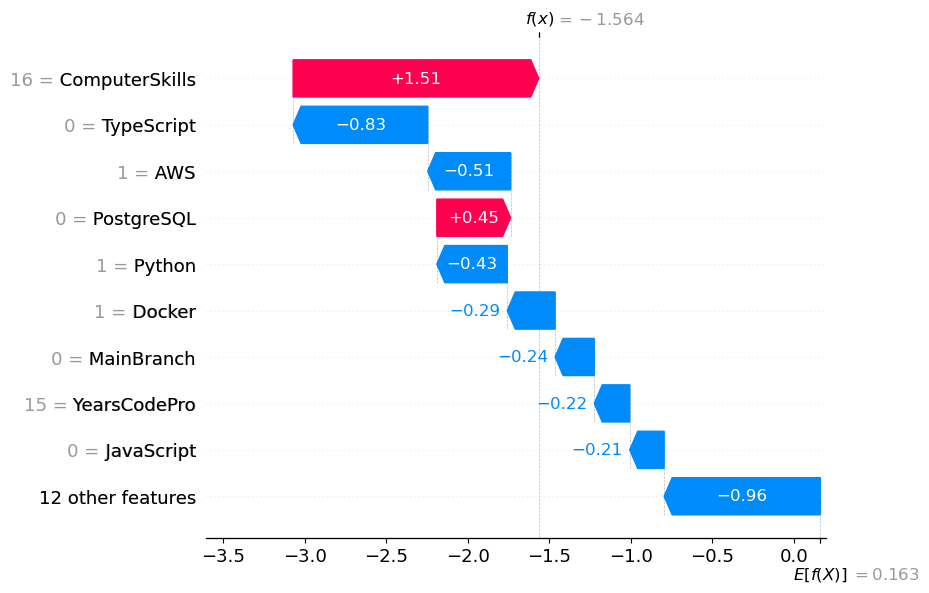

In [7]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_train)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


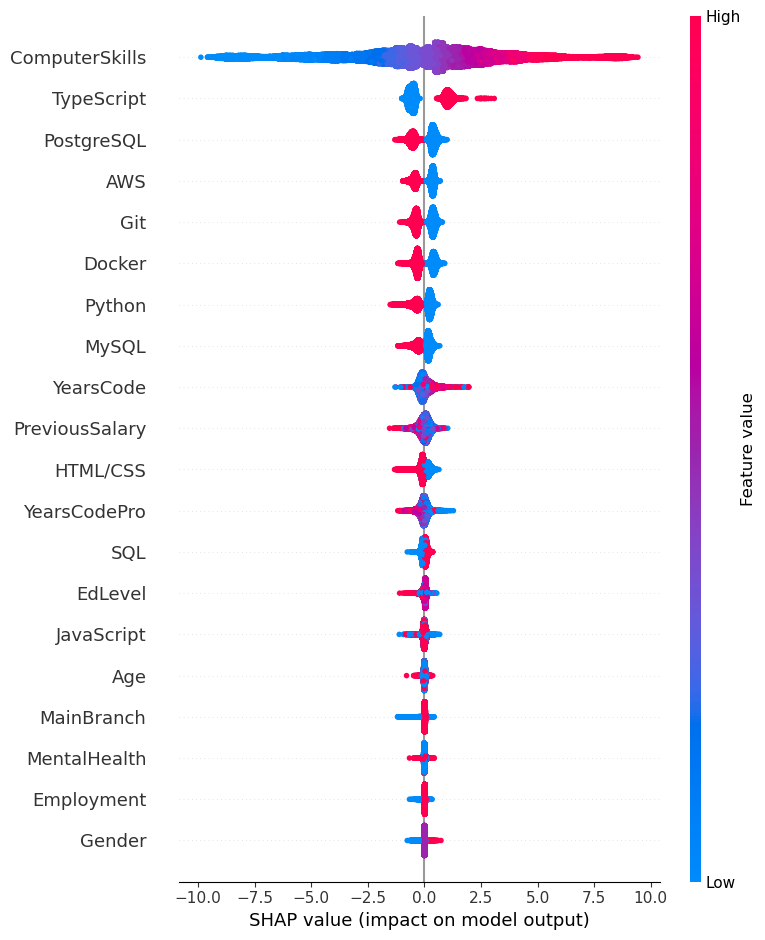

In [8]:
shap.summary_plot(shap_values, X_train)


In [9]:
from data_process import split_and_drop
X_train, y_train = split_and_drop(train, version = 'dropComputerSkills')
X_valid, y_valid = split_and_drop(valid, version = 'dropComputerSkills')
X_test, y_test = split_and_drop(test, version = 'dropComputerSkills')

In [10]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [11]:
# Create a SHAP explainer
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_train)

# # Visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

[02:48:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


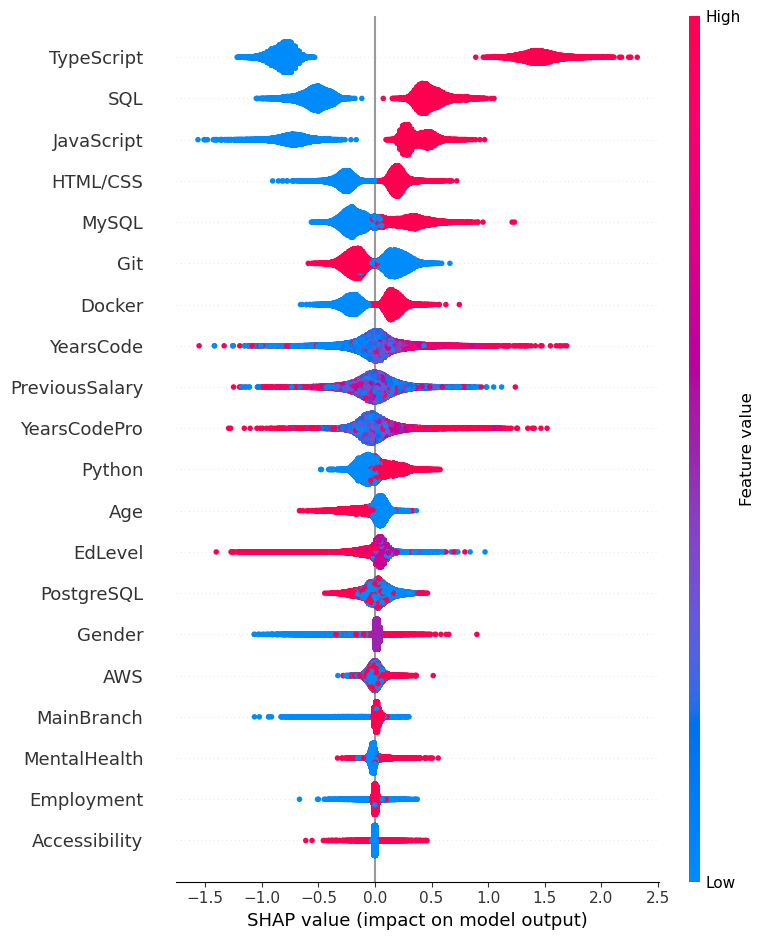

In [12]:
shap.summary_plot(shap_values, X_train)
